# Handwriting Recognition using Machine Learning

Jaquan Jones

## A) Download the dataset “Digit” and its label from this (link)[https://app.box.com/s/sogk96kukv6ayyyy6ym63a2nu3aozif7]

* Check out the dataset 

* **Data includes 1797 small images, 8x8 pixels, each one includes a hand-written digit 0-9**

* You have to download the corresponding csv file that includes the labels of the images

* The goal is to **build a Machine Learning Algorithm that can recognize the hand-written digits**

In [14]:
import pandas as pd
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## B) Build the feature matrix and label vector: 

* Each image is considered as a data sample with pixels as features
* To build the feature table you have to convert each 8x8 image into an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with 64 feature columns

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/jaquanjones/Handwriting-Recognition-Using-ML/7c2fc30b217c0d5dec618b906d684bac7613a1ac/label.csv')

df.head()

,name of the file,digit label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [16]:
file_names = df['name of the file'].tolist()

y = df['digit label']

print(f'{len(file_names)} files in \'Digit/\'')

y.head()

1797 files in 'Digit/'


0    0
1    1
2    2
3    3
4    4
Name: digit label, dtype: int64

In [17]:
# method to show image given file name
def show_file_images(filename):
    url = 'Digit/' + str(filename) + '.jpg'
    img=mpimg.imread(url)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

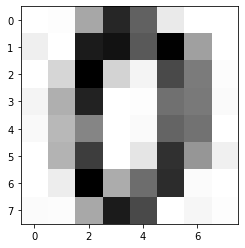

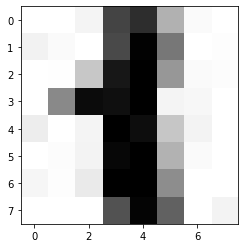

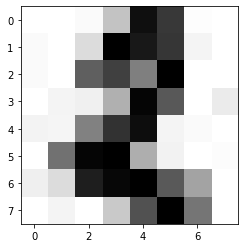

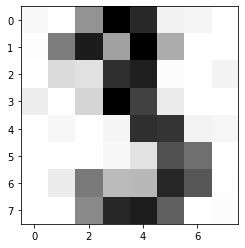

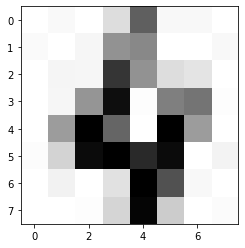

In [18]:
for f in file_names[:5]:
    show_file_images(f)

In [19]:
feature_array = []

for f in file_names:
    url = 'Digit/' + str(f) + '.jpg'
    img=mpimg.imread(url)
    feature_array.append(img.reshape(64))

In [20]:
feature_matrix = pd.DataFrame(feature_array)

print('Feature Matrix:\n')

feature_matrix.head()

Feature Matrix:



,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,2,88,217,158,21,0,0,16,0,...,4,0,4,3,87,228,182,0,9,2
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,0,0,172,251,157,0,12
2,0,0,5,59,240,199,2,0,5,0,...,92,0,0,11,0,54,173,255,138,0
3,6,0,108,255,213,13,10,0,2,131,...,168,1,0,0,118,217,226,159,0,3
4,0,6,0,34,160,7,7,0,5,0,...,7,0,0,0,2,42,250,51,0,4


## C) Use sklearn functions to split the dataset into testing and training sets with the following parameters:
* test_size=0.1
* random_state=2

In [21]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, y, test_size=0.1, random_state=2)

print('\nSize of training set:')
print(X_train.shape)
print(y_train.shape)

print('\nSize of testing set:')
print(X_test.shape)
print(y_test.shape)


Size of training set:
(1617, 64)
(1617,)

Size of testing set:
(180, 64)
(180,)


## D) Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that you built in part (C)

In [22]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train, y_train)

y_predictions = my_RandomForest.predict(X_test)

print('\'y\' predictions:')
y_predictions

'y' predictions:


array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 7, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 1, 5, 7,
       5, 4, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 7, 4, 7,
       2, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 7, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 5, 7, 4, 8, 9, 5, 7, 6, 9, 4, 0,
       4, 0, 0, 4])

In [23]:
rf_accuracy_score = accuracy_score(y_test, y_predictions)

print(f'Random Forest accuracy score: {rf_accuracy_score}')

Random Forest accuracy score: 0.9277777777777778


## E) Write some codes to find which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set.

In [24]:
y_test_dictionary = y_test.to_dict()

y_test_file_names = list(y_test_dictionary.keys())

inaccuracy_list = []

for name_of_file, correct_label, label_guess in zip(y_test_file_names, y_test, y_predictions):
    if int(correct_label) != int(label_guess):
        inaccuracy_list.append(name_of_file)

print(f'Number of inaccurate guesses: {len(inaccuracy_list)}')
print('\nNames of files with inaccurate guesses:')
print(inaccuracy_list)

Number of inaccurate guesses: 13

Names of files with inaccurate guesses:
[1660, 1611, 123, 1582, 492, 1603, 1628, 1605, 794, 37, 69, 1468, 1573]


Innaccurate file classifications:


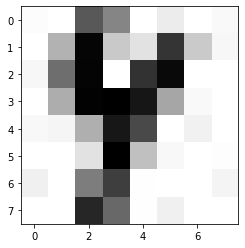

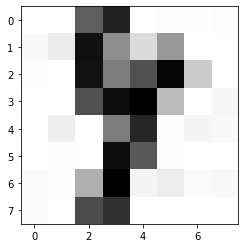

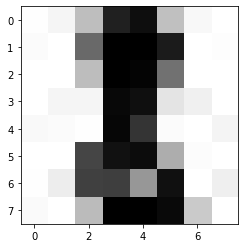

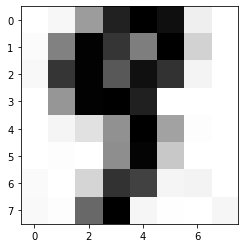

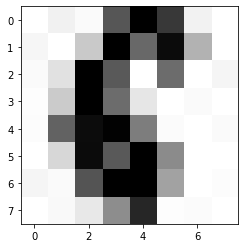

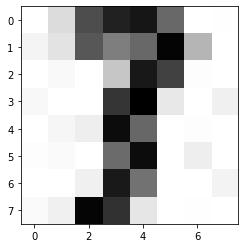

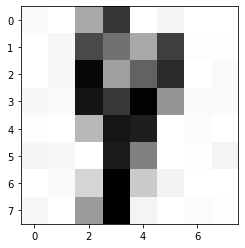

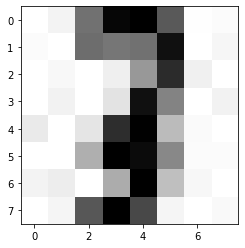

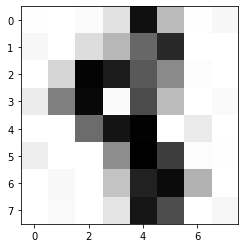

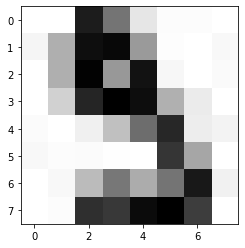

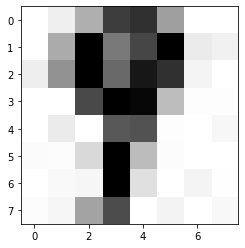

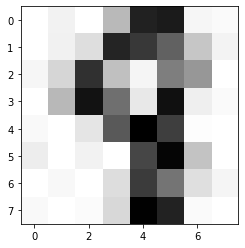

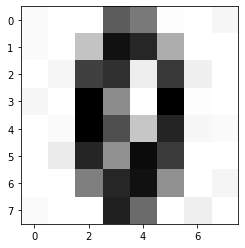

In [25]:
print("Innaccurate file classifications:")
for f in inaccuracy_list:
    show_file_images(f)